In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi']= 500
sns.set_context("notebook")
sns.set(style="white")

In [4]:
cellvgae_node_embs = np.load('CellVGAE/cellvgae_node_embs.npy')
cellvgae_umap = np.load('CellVGAE/cellvgae_umap.npy')
cellvgae_clusters = np.load('CellVGAE/cellvgae_clusters.npy')

In [5]:
sam_umap = np.load('SAM/sam_umap.npy')
sam_clusters = np.load('SAM/sam_clusters.npy')

In [6]:
diffvae_umap = np.load('DiffVAE/diffvae_umap.npy')

In [7]:
seurat_umap_df = pd.read_csv('Seurat/seurat_umap.csv')
seurat_umap = seurat_umap_df[['UMAP_1', 'UMAP_2']].values

In [8]:
sam_cl0 = seurat_umap_df.iloc[sam_clusters == 0]['Unnamed: 0'].values
sam_cl1 = seurat_umap_df.iloc[sam_clusters == 1]['Unnamed: 0'].values
sam_cl2 = seurat_umap_df.iloc[sam_clusters == 2]['Unnamed: 0'].values

In [11]:
cell_cl0 = seurat_umap_df.loc[cellvgae_clusters == 0]['Unnamed: 0'].values
cell_cl1 = seurat_umap_df.loc[cellvgae_clusters == 1]['Unnamed: 0'].values
cell_cl2 = seurat_umap_df.loc[cellvgae_clusters == 2]['Unnamed: 0'].values

In [12]:
def overlap_percent(vgae_list, sam_list):
    common = len([x for x in vgae_list if x in sam_list])
    return common, common / len(sam_list)

In [16]:
overlap_percent(cell_cl1, sam_cl0)

(142, 0.9530201342281879)

In [17]:
overlap_percent(cell_cl2, sam_cl1)

(73, 0.7604166666666666)

In [18]:
overlap_percent(cell_cl0, sam_cl2)

(88, 0.946236559139785)

In [19]:
len(sam_cl1)

96

In [20]:
len(sam_cl2)

93

In [21]:
len(sam_cl0)

149

In [25]:
lbl_sz = 4
plt.rc('xtick', labelsize=lbl_sz)
plt.rc('ytick', labelsize=lbl_sz)

In [26]:
mpl.rcParams['xtick.major.pad']='-2'
mpl.rcParams['ytick.major.pad']='-2'

In [27]:
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']

In [28]:
sns.set_style('white', {'axes.edgecolor':'black'})

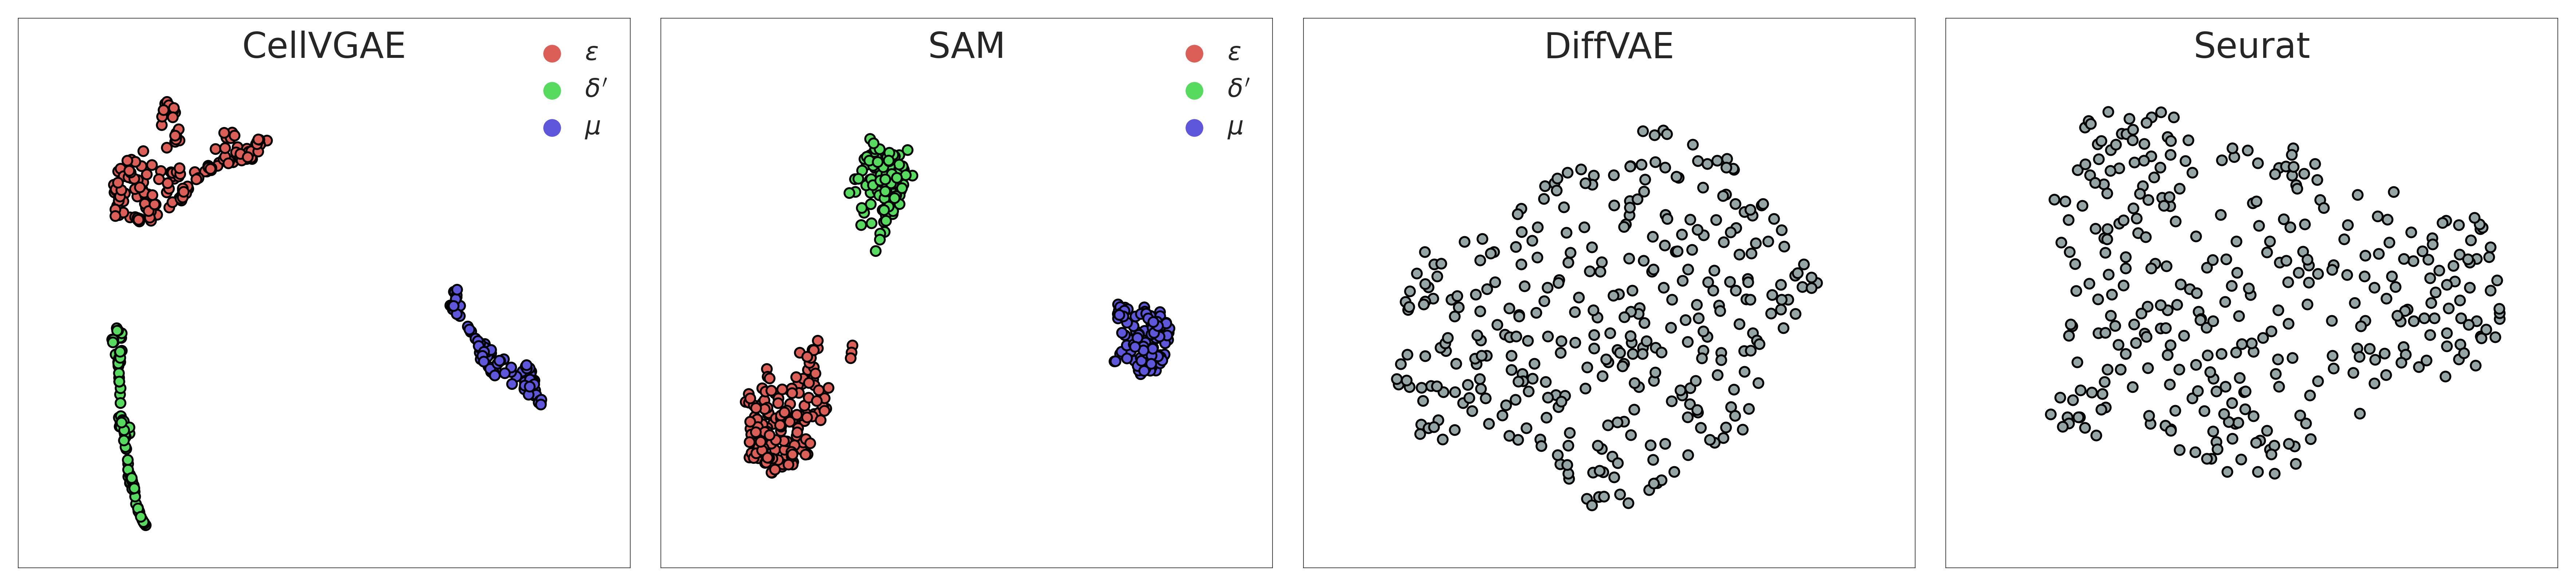

In [22]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 4))
sns.scatterplot(x=cellvgae_umap[:, 0], y=cellvgae_umap[:, 1], hue=cellvgae_clusters, palette=[(0.3712, 0.33999999999999997, 0.86), (0.86, 0.3712, 0.33999999999999997), (0.33999999999999997, 0.86, 0.3712)], s=15, edgecolor='black', linewidth=0.75, ax=ax1)
sns.scatterplot(x=sam_umap[:, 0], y=sam_umap[:, 1], hue=sam_clusters, palette=sns.color_palette("hls", len(set(sam_clusters))), s=15, edgecolor='black', linewidth=0.75, ax=ax2)
sns.scatterplot(x=diffvae_umap[:, 0], y=diffvae_umap[:, 1], color='#95a5a6', s=15, edgecolor='black', linewidth=0.75, ax=ax3)
sns.scatterplot(x=seurat_umap[:, 0], y=seurat_umap[:, 1], color='#95a5a6', s=15, edgecolor='black', linewidth=0.75, ax=ax4)

for ax in (ax1, ax2, ax3, ax4):
    ax.spines['left'].set_linewidth(0.25)
    ax.spines['top'].set_linewidth(0.25)
    ax.spines['bottom'].set_linewidth(0.25)
    ax.spines['right'].set_linewidth(0.25)

# Setting the values for all axes.
plt.setp(ax1, xlim=(-8, 20), ylim=(-3, 15))
plt.setp(ax2, xlim=(-10, 14), ylim=(-3, 10))
plt.setp(ax3, xlim=(4, 12), ylim=(4, 12))
plt.setp(ax4, xlim=(-5, 5), ylim=(-5, 5))

ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1_handles, ax1_labels = ax1.get_legend_handles_labels()
ax1_handles = [ax1_handles[1], ax1_handles[2], ax1_handles[0]]
ax1.legend(handletextpad=0.3, fontsize=10, handles=ax1_handles, labels=['$\epsilon$', '$\delta\'$', '$\mu$'], frameon=False)
ax1.set_title("CellVGAE", position=(0.5, 0.9), fontdict={'fontsize': 14})

ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.legend(handletextpad=0.3, fontsize=10, handles=ax1_handles, labels=['$\epsilon$', '$\delta\'$', '$\mu$'], frameon=False)
ax2.set_title("SAM", position=(0.5, 0.9), fontdict={'fontsize': 14})

ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax3.set_title("DiffVAE", position=(0.5, 0.9), fontdict={'fontsize': 14})

ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
ax4.set_title("Seurat", position=(0.5, 0.9), fontdict={'fontsize': 14})

plt.subplots_adjust(wspace=0.05, hspace=0.05)
# plt.savefig('schisto_plots.pdf', dpi=500, bbox_inches='tight')